In [1]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [6]:
sb.set(style='whitegrid',context="notebook",rc={'figure.figsize':(10, 6)})
%matplotlib inline

In [7]:
df=pd.read_csv('netflix_titles.csv')

In [8]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [10]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
before=len(df)
df=df.drop_duplicates()
after=len(df)
print(f"Removed {before - after} duplicate rows")

Removed 0 duplicate rows


In [14]:
df.columns=df.columns.str.strip().str.lower().str.replace(' ','_')
df.columns.tolist()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [16]:
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')

In [17]:
df['added_year']=df["date_added"].dt.year
df['added_month']=df["date_added"].dt.month
df['added_month_name']=df["date_added"].dt.month_name()

In [18]:
# create columns
df['duration'] = df['duration'].astype(str)  # ensure string
# examples "90 min", "3 Seasons"
df[['duration_val','duration_unit']] = df['duration'].str.extract(r'(\d+)\s*([A-Za-z]+)', expand=True)
df['duration_val'] = pd.to_numeric(df['duration_val'], errors='coerce')
df['duration_unit'] = df['duration_unit'].str.lower()


In [19]:
# fill missing country with Unknown
df['country'] = df['country'].fillna('Unknown')

# primary country = first in list
df['primary_country'] = df['country'].str.split(',').str[0].str.strip()

# optionally create exploded dataframe for per-country counts:
df_exploded = df.assign(country_exploded = df['country'].str.split(',')).explode('country_exploded')
df_exploded['country_exploded'] = df_exploded['country_exploded'].str.strip()


In [20]:
df['rating'] = df['rating'].fillna('Not Rated').str.strip()
df['rating'].value_counts(dropna=False).head(20)


rating
TV-MA        3207
TV-14        2160
TV-PG         863
R             799
PG-13         490
TV-Y7         334
TV-Y          307
PG            287
TV-G          220
NR             80
G              41
TV-Y7-FV        6
Not Rated       4
NC-17           3
UR              3
66 min          1
74 min          1
84 min          1
Name: count, dtype: int64

In [21]:
# quick overview
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing>0]


director            2634
cast                 825
added_year            98
added_month_name      98
date_added            98
added_month           98
duration_val           3
duration_unit          3
dtype: int64

In [22]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')


In [23]:
df['is_movie'] = df['type'].str.lower() == 'movie'
df['release_decade'] = (df['release_year'] // 10) * 10
df['title_len'] = df['title'].str.len()


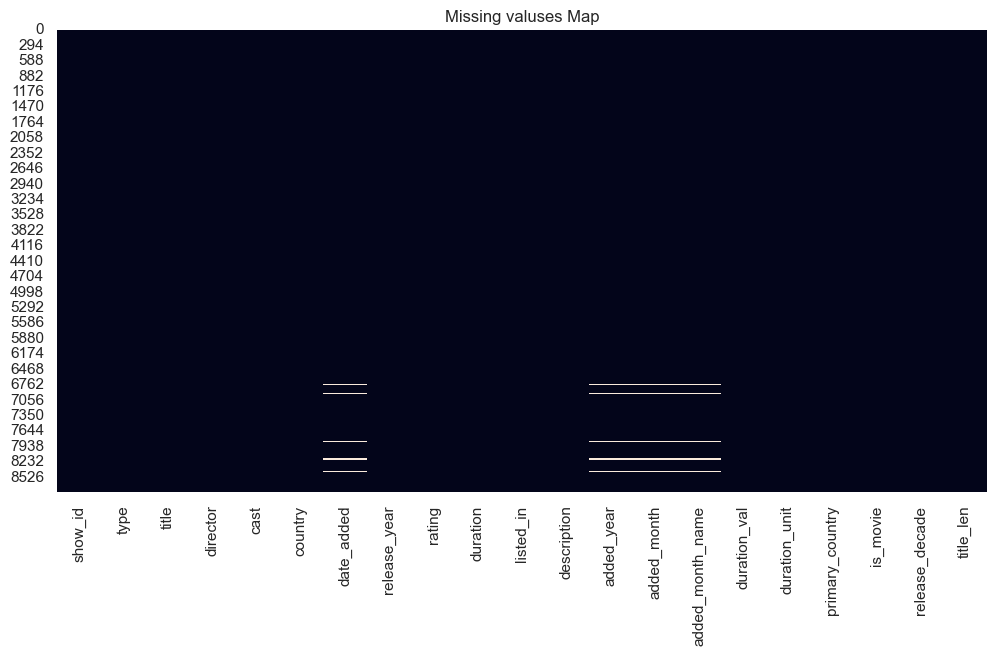

In [24]:
plt.figure(figsize=(12,6))
sb.heatmap(df.isnull(),cbar=False)
plt.title("Missing valuses Map")
plt.show()

Text(0.5, 11.249999999999995, '')

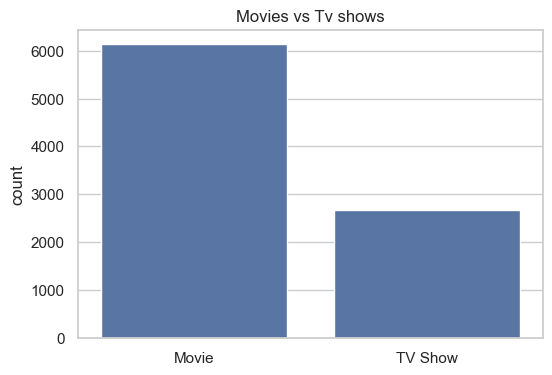

In [42]:
plt.figure(figsize=(6,4))
sb.countplot(data=df,x='type',order=df['type'].value_counts().index)
plt.title("Movies vs Tv shows")
plt.savefig('Movies vs Tv Shows.png',bbox_inches='tight',dpi=150)
plt.xlabel('')


Text(0, 0.5, 'Count')

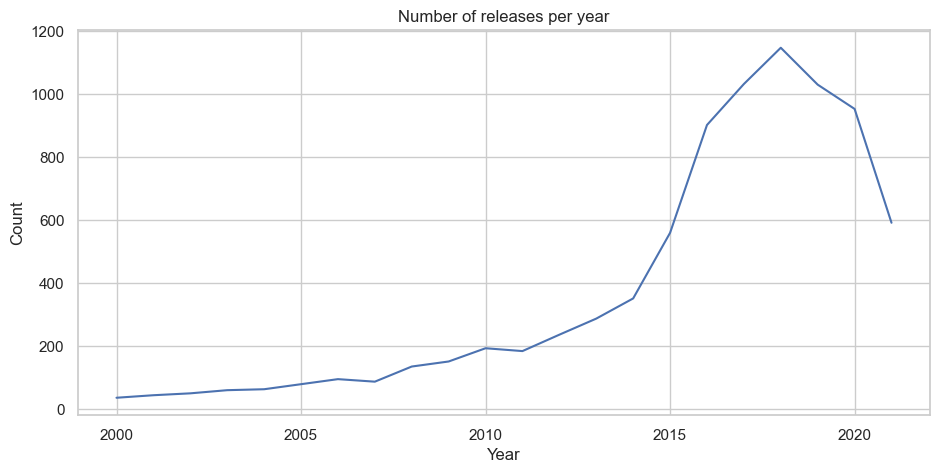

In [26]:
counts=df['release_year'].value_counts().sort_index()
plt.figure(figsize=(11,5))
counts.loc[2000:2022].plot(kind='line')
plt.title('Number of releases per year')
plt.xlabel('Year')
plt.ylabel('Count')


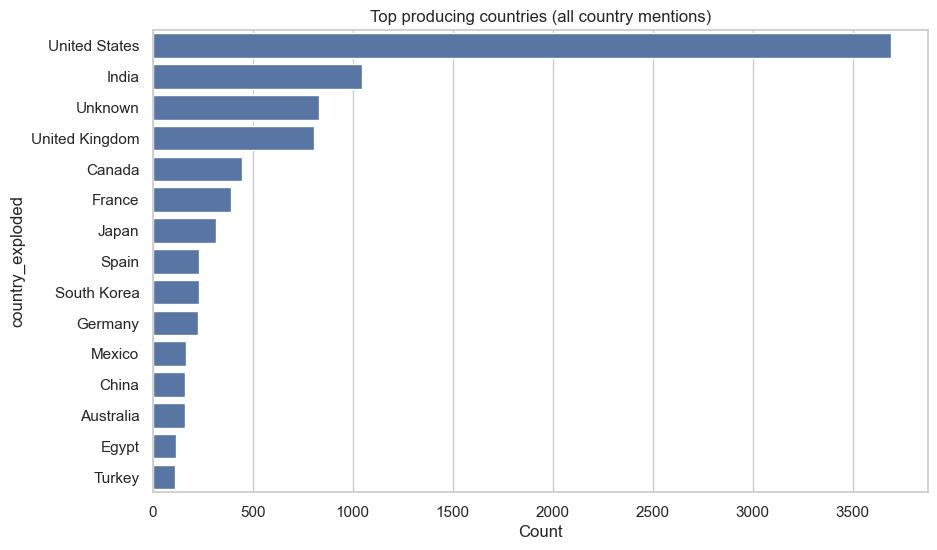

In [28]:
top_countries = df_exploded['country_exploded'].value_counts().head(15)
plt.figure(figsize=(10,6))
sb.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top producing countries (all country mentions)')
plt.xlabel('Count')
plt.show()


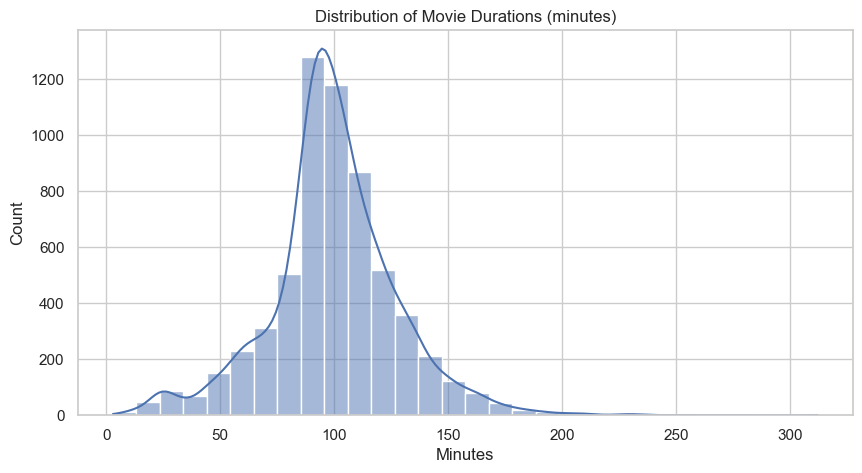

In [29]:
movie_minutes = df[(df['duration_unit']=='min') & df['duration_val'].notnull()]['duration_val']
plt.figure(figsize=(10,5))
sb.histplot(movie_minutes, bins=30, kde=True)
plt.title('Distribution of Movie Durations (minutes)')
plt.xlabel('Minutes')
plt.show()


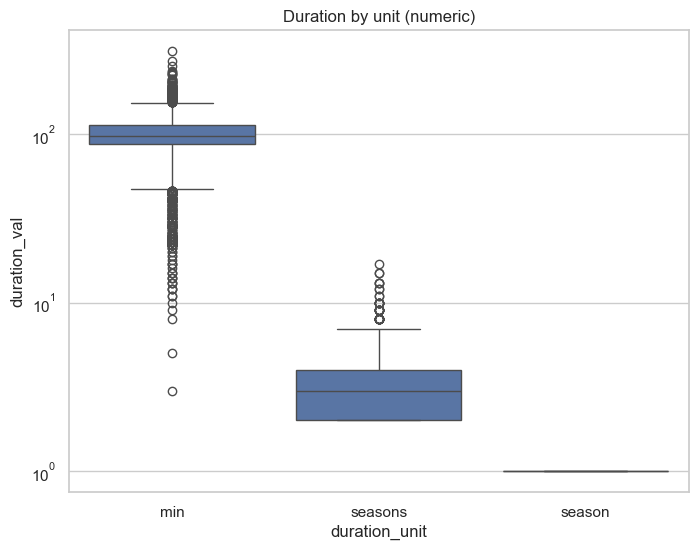

In [30]:
plt.figure(figsize=(8,6))
sb.boxplot(x='duration_unit', y='duration_val', data=df[df['duration_val'].notnull()])
plt.yscale('log')  # optional if distribution skewed
plt.title('Duration by unit (numeric)')
plt.show()


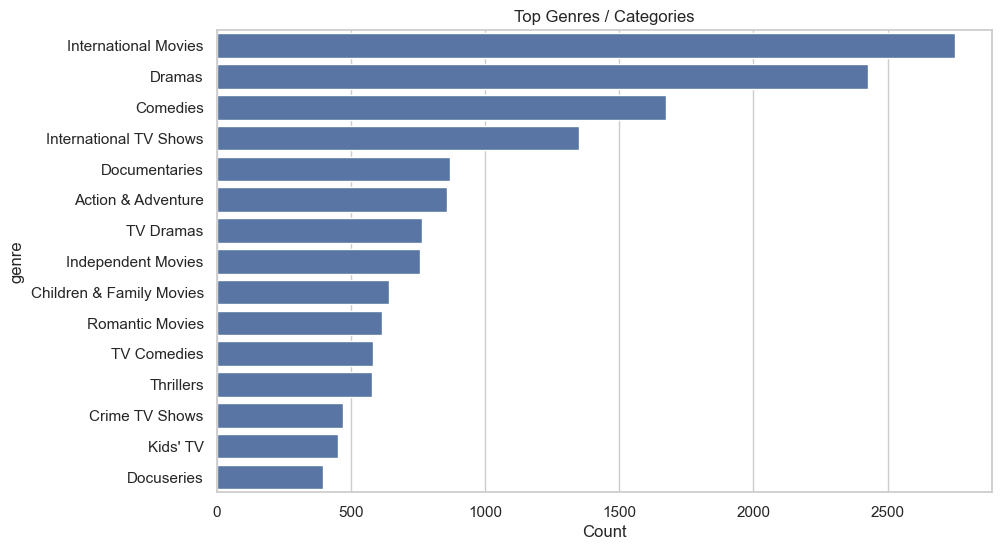

In [41]:
# explode genres
df['listed_in'] = df['listed_in'].fillna('Unknown')
df_genres = df.assign(genre = df['listed_in'].str.split(',')).explode('genre')
df_genres['genre'] = df_genres['genre'].str.strip()
top_genres = df_genres['genre'].value_counts().head(15)
plt.figure(figsize=(10,6))
sb.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top Genres / Categories')
plt.xlabel('Count')
plt.savefig('Top Genres Categories.png', bbox_inches='tight', dpi=150)

plt.show()


In [32]:
pairs = df_exploded.groupby(['primary_country','director']).size().reset_index(name='count')
top_pairs = pairs.sort_values('count', ascending=False).head(20)
top_pairs


,primary_country,director,count
4268,United States,Steven Spielberg,18
4678,Unknown,Rajiv Chilaka,16
4732,Unknown,Suhas Kadav,15
3728,United States,Marcus Raboy,15
3376,United States,Jay Karas,14
1897,Philippines,Cathy Garcia-Molina,13
3790,United States,McG,13
85,Australia,Matthew Salleh,12
3375,United States,Jay Chapman,12
3762,United States,Martin Scorsese,12


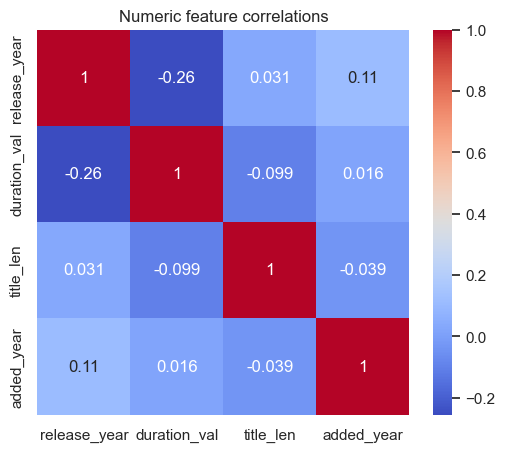

In [39]:
num = df[['release_year','duration_val','title_len','added_year']].dropna()
corr = num.corr()
plt.figure(figsize=(6,5))
sb.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Numeric feature correlations')
plt.savefig('Numeric feature correlations.png', bbox_inches='tight', dpi=150)



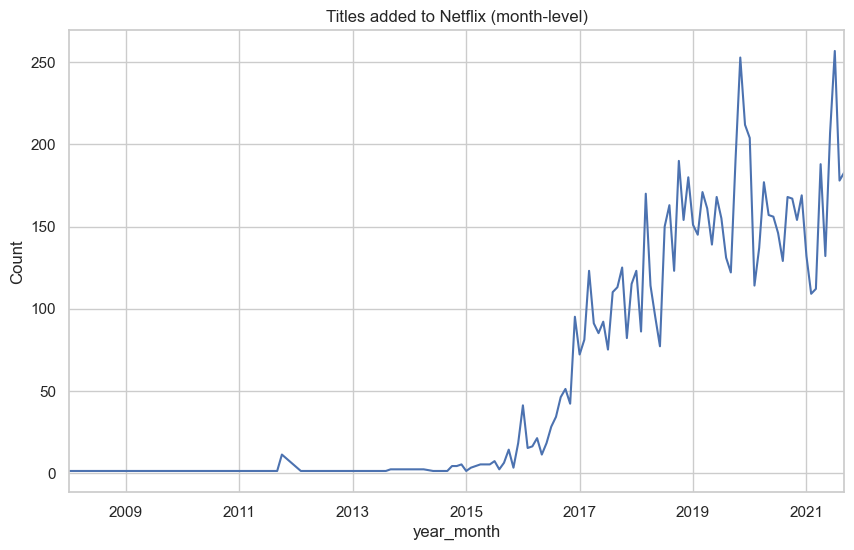

In [38]:
# group by year-month
df_valid = df[df['date_added'].notnull()].copy()
df_valid['year_month'] = df_valid['date_added'].dt.to_period('M')
monthly = df_valid.groupby('year_month').size()
monthly.plot()
plt.title('Titles added to Netflix (month-level)')
plt.ylabel('Count')
plt.savefig('Titles added to Netflix (month-level).png', bbox_inches='tight', dpi=150)


plt.show()


In [35]:
df.to_csv('netflix_cleaned.csv', index=False)
